# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












Takes a data frame and displays graph in the same way as the lecture's example.
  def make_fiveThirtyEight(df_data): 



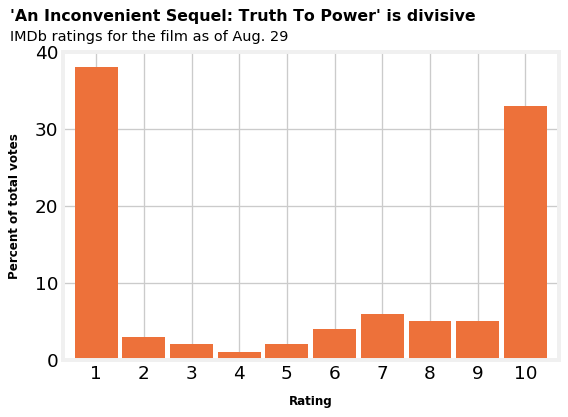

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#Uses the 538 stylesheet
#from https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

def make_fiveThirtyEight(df_data):
  """Takes a data frame and displays graph in the same way as the lecture's example.
  def make_fiveThirtyEight(df_data):"""
  
  plt.style.use('fivethirtyeight')

  #generates the figure to store into fig
  fig = plt.figure(dpi=95)
  fig.patch.set(facecolor='white')
  
  #generate our axes into ax
  ax  = df_data.plot.bar(color="#ED713A", width=0.9)
  ax.set(facecolor='white')
  
  #text from graph
  ax.text(x=-1.8, y=44, s="'An Inconvenient Sequel: Truth To Power' is divisive",
         fontweight='bold', fontsize=12)
  ax.text(x=-1.8, y=41.5, s="IMDb ratings for the film as of Aug. 29",
         fontsize=11)
  
  # Set our axis labels (These are just text objects that have been rotated!!)
  ax.set_ylabel("Percent of total votes", fontsize=9, fontweight='bold',
               labelpad=10)
  ax.set_xlabel("Rating", fontsize=9, fontweight='bold', labelpad=10)
  
  # Fix our tick lables. Yet again, these are text and use the text parameters!
  ax.set_xticklabels(range(1,11), rotation=0)
  ax.set_yticks(range(0,50,10))
  ax.set_yticklabels(range(0,50,10))
  
  # "Squelch" the funny return output that shows up above the graph
  #plt.show()
  
  show = plt.show()
  
  return show

print (make_fiveThirtyEight.__doc__, "\n")
make_fiveThirtyEight(fake)

In [3]:
from IPython.display import display, Image
import numpy as np

trump_approval = 'https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv'
trump_approval_example = 'https://github.com/JeanFraga/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/raw/master/module3-make-explanatory-visualizations/Trump_approval_ratings.PNG'

#condition='1/23/2017'
df = pd.read_csv(trump_approval)
example = Image(url=trump_approval_example, width=600)

df['enddate'] = pd.to_datetime(df['enddate'])
start_date = '1-22-2017'
end_date = '7-23-2017'
mask = (df['enddate'] > start_date) & (df['enddate'] <= end_date)
#looking at the image better I need to cut the information to only show
#from Jan 23/ 2017 to jul/2017

df = df.loc[mask]
df=df[['enddate','weight','approve','disapprove']]
df=df.sort_values('enddate')
print(df.shape)
df.head(10)

(1637, 4)


,enddate,weight,approve,disapprove
3,2017-01-23,0.226788,45.0,46.0
3984,2017-01-23,0.226788,45.0,46.0
2,2017-01-24,0.224456,42.1,45.2
3985,2017-01-24,0.212047,46.0,45.0
6539,2017-01-24,0.127926,45.2,44.3
6541,2017-01-24,0.220390,57.0,43.0
6545,2017-01-24,1.165807,44.0,44.0
3983,2017-01-24,0.224456,42.1,45.2
4,2017-01-24,0.220390,57.0,43.0
9,2017-01-24,1.165807,44.0,44.0


In [14]:

import datetime
df_test=df[['enddate','approve']]
df_test=df_test.set_index('enddate')
#pd.to_datetime(df['enddate'])
df_test = df_test.resample('D').mean()
df_test.shape
df_test2=df[['enddate','disapprove']]
df_test2=df_test2.set_index('enddate')
#pd.to_datetime(df['enddate'])
df_test2 = df_test2.resample('D').mean()

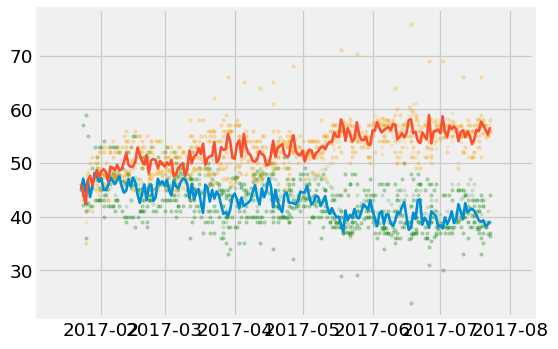

In [17]:
def trump_approval_plot(df_endate, df_approve, df_disapprove ):
  plt.style.use('fivethirtyeight')
  fig = plt.figure(dpi=95)
  fig.patch.set(facecolor='white')
  area = np.pi*2
  
  ax1 = plt.scatter(df_endate,df_approve, s=area, alpha=.15)
  ax1.set(facecolor='green')
  ax3 = plt.plot(df_test,linewidth=2)
  ax2 = plt.scatter(df_endate,df_disapprove, s=area, alpha=.15)
  ax2.set(facecolor='orange')
  ax4 = plt.plot(df_test2,linewidth=2)
  #ax4.set(facecolor='orange')
  
  return plt.show()

trump_approval_plot(df['enddate'], df['approve'],df['disapprove'])

In [10]:
display(example)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here